In [1]:
#pip install catboost

In [2]:
import pandas as pd
import numpy as np
import re

# Import sklearn 
import statsmodels.formula.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# Import Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor

#import the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#Import visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.graph_objects as go
#Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

# Load the dataset to predict the unemployment Rate

In [3]:
#df = pd.read_csv("/Users/aman/Documents/omdena/Kenya/data/feature_engineering/Feature_Engineered_Dataset.csv",header=0)

df = pd.read_csv("Feature_Engineered_Dataset.csv",header=0)
df.head()

Year  Real_GDP_Ksh  Population_Growth  Female_Labor_Participation  \
0  2000        982855               2.92                       50.46   
1  2001       1020111               3.03                       50.03   
2  2002       1025583               3.03                       49.61   
3  2003       1055658               2.97                       49.18   
4  2004       1109338               2.99                       48.76   

   Male_Labor_Participation  Education_Expenditure_Ksh  Inflation  \
0                     46.89               4.914291e+10       9.98   
1                     46.87               5.154121e+10       5.73   
2                     46.84               5.949633e+10       1.97   
3                     46.82               7.552908e+10       9.81   
4                     46.79               8.157499e+10      11.80   

   Dollar_Rate  Total_Unemployment  Labor_Total_Population_Ratio  \
0    76.175542                3.13                      0.920229   
1    78.563195                3.07                      0.924819   
2    78.749142                3.09                      0.923703   
3    84.148300                3.04                      0.921479   
4    80.650112                3.00                      0.918978   

   Urban_Population_Growth_Income_Per_Capita_Growth_Ratio  
0                                           1.030328       
1                                           1.050862       
2                                           1.055151       
3                                           1.039266       
4                                           1.043338

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Year                                                    23 non-null     int64  
 1   Real_GDP_Ksh                                            23 non-null     int64  
 2   Population_Growth                                       23 non-null     float64
 3   Female_Labor_Participation                              23 non-null     float64
 4   Male_Labor_Participation                                23 non-null     float64
 5   Education_Expenditure_Ksh                               23 non-null     float64
 6   Inflation                                               23 non-null     float64
 7   Dollar_Rate                                             23 non-null     float64
 8   Total_Unemployment                        

# Calculate the correlations for all the features

In [5]:
df_corr=df.corr(method='pearson')
df_corr

Year  Real_GDP_Ksh  \
Year                                                1.000000      0.958278   
Real_GDP_Ksh                                        0.958278      1.000000   
Population_Growth                                  -0.949936     -0.938077   
Female_Labor_Participation                         -0.997229     -0.956271   
Male_Labor_Participation                           -0.783145     -0.708740   
Education_Expenditure_Ksh                           0.855113      0.825043   
Inflation                                          -0.222906     -0.240873   
Dollar_Rate                                         0.866087      0.874588   
Total_Unemployment                                  0.676683      0.597949   
Labor_Total_Population_Ratio                        0.599325      0.537302   
Urban_Population_Growth_Income_Per_Capita_Growt... -0.826015     -0.829863   

                                                    Population_Growth  \
Year                                                        -0.949936   
Real_GDP_Ksh                                                -0.938077   
Population_Growth                                            1.000000   
Female_Labor_Participation                                   0.950202   
Male_Labor_Participation                                     0.793354   
Education_Expenditure_Ksh                                   -0.864708   
Inflation                                                    0.299956   
Dollar_Rate                                                 -0.932283   
Total_Unemployment                                          -0.695958   
Labor_Total_Population_Ratio                                -0.721325   
Urban_Population_Growth_Income_Per_Capita_Growt...           0.845177   

                                                    Female_Labor_Participation  \
Year                                                                 -0.997229   
Real_GDP_Ksh                                                         -0.956271   
Population_Growth                                                     0.950202   
Female_Labor_Participation                                            1.000000   
Male_Labor_Participation                                              0.786193   
Education_Expenditure_Ksh                                            -0.884954   
Inflation                                                             0.234257   
Dollar_Rate                                                          -0.856210   
Total_Unemployment                                                   -0.673330   
Labor_Total_Population_Ratio                                         -0.579727   
Urban_Population_Growth_Income_Per_Capita_Growt...                    0.848788   

                                                    Male_Labor_Participation  \
Year                                                               -0.783145   
Real_GDP_Ksh                                                       -0.708740   
Population_Growth                                                   0.793354   
Female_Labor_Participation                                          0.786193   
Male_Labor_Participation                                            1.000000   
Education_Expenditure_Ksh                                          -0.678050   
Inflation                                                           0.284686   
Dollar_Rate                                                        -0.800162   
Total_Unemployment                                                 -0.981433   
Labor_Total_Population_Ratio                                       -0.804742   
Urban_Population_Growth_Income_Per_Capita_Growt...                  0.705676   

                                                    Education_Expenditure_Ksh  \
Year                                                                 0.855113   
Real_GDP_Ksh                                                         0.825043   
Population_Growth                                    

In [6]:
df_corr["Total_Unemployment"].sort_values(ascending=False)

Total_Unemployment                                        1.000000
Labor_Total_Population_Ratio                              0.823253
Dollar_Rate                                               0.743674
Year                                                      0.676683
Real_GDP_Ksh                                              0.597949
Education_Expenditure_Ksh                                 0.545905
Inflation                                                -0.256000
Urban_Population_Growth_Income_Per_Capita_Growth_Ratio   -0.607461
Female_Labor_Participation                               -0.673330
Population_Growth                                        -0.695958
Male_Labor_Participation                                 -0.981433
Name: Total_Unemployment, dtype: float64

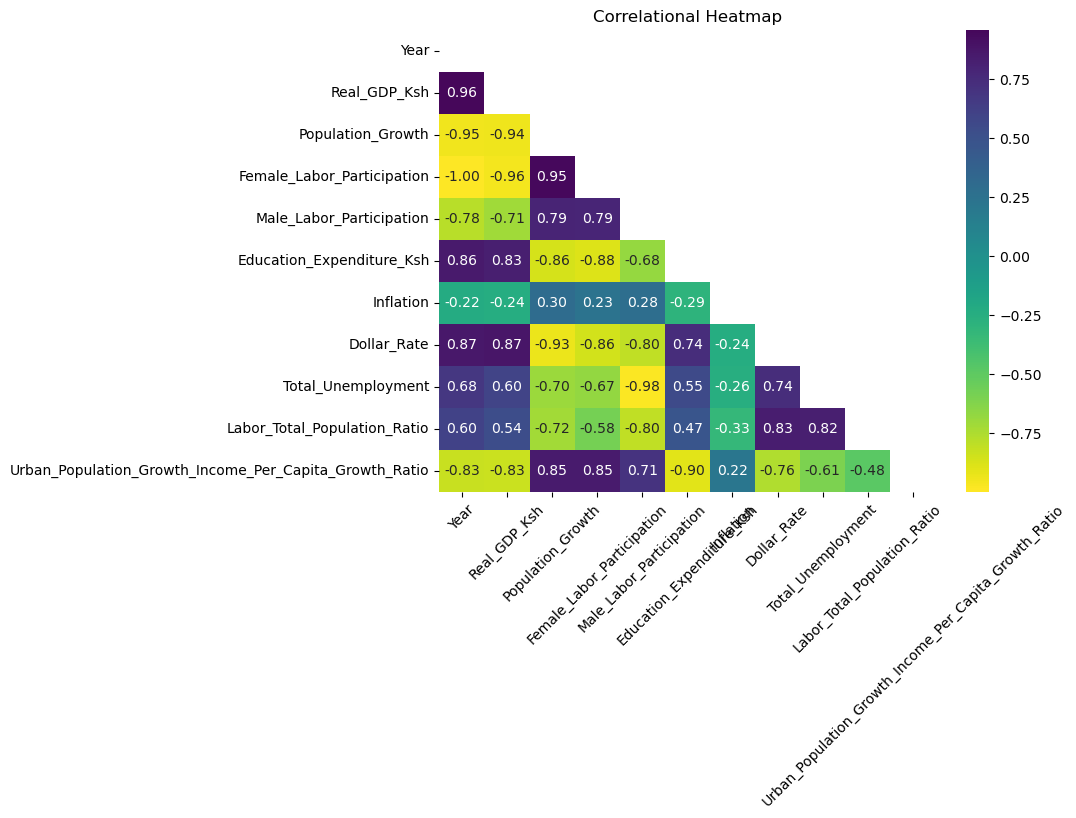

In [7]:
# Correlation Matrix
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', center=0, mask=mask, fmt=".2f")
plt.xticks(rotation = 45)
plt.title('Correlational Heatmap')
plt.show()

# Visual correlation of each feature with the target variable with time 

In [8]:
variables = list(df.columns)  

for variable in variables:
    # Create a new figure
    fig = go.Figure()

    # Add trace for the selected variable
    fig.add_trace(go.Scatter(x=df['Year'], y=df[variable], mode='lines', name=variable, line=dict(color='green')))

    # Create second y-axis
    fig.update_layout(
        yaxis2=dict(
            overlaying='y',
            side='right',
            showgrid=False,
            title='Unemployment Rate (%)',
            titlefont=dict(color='blue'),
            tickfont=dict(color='blue')))

    # Add trace for Total_Unemployment
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Total_Unemployment'], mode='lines', name='Total_Unemployment', line=dict(color='blue'), yaxis='y2'))

    # Update layout
    fig.update_layout(
        xaxis=dict(title='Year'),
        title=f'Total_Unemployment vs {variable}')

    # Show the figure
    fig.show()

# Target Variable distribution

Text(0.5, 1.0, 'Distribution of the Total_Unemployment')

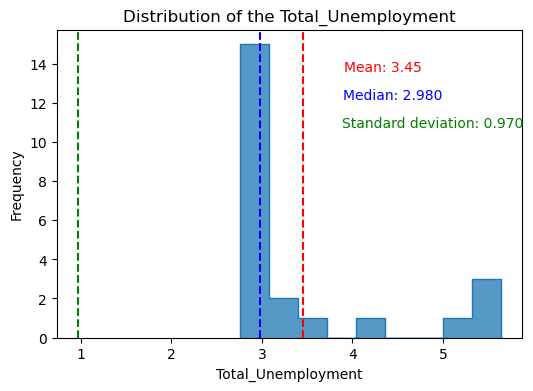

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Total_Unemployment', element='step', common_norm=False)


mean = np.mean(df['Total_Unemployment'])
median = np.median(df['Total_Unemployment'])
std_deviation = np.std(df['Total_Unemployment'])

plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='blue', linestyle='--')
plt.axvline(x=std_deviation, color='green', linestyle='--')

# annotate mean,median & Standard deviation
plt.annotate(f'Mean: {mean:.3}', xy=(mean, plt.gca().get_ylim()[1]), xytext=(30, -30),
             textcoords='offset points', color='red', fontsize=10)
plt.annotate(f'Median: {median:.3f}', xy=(median, plt.gca().get_ylim()[1]), xytext=(60, -50),
             textcoords='offset points', color='blue', fontsize=10)
plt.annotate(f'Standard deviation: {std_deviation:.3f}', xy=(std_deviation, plt.gca().get_ylim()[1]), xytext=(190, -70),
           textcoords='offset points', color='green', fontsize=10)
plt.xlabel('Total_Unemployment')
plt.ylabel('Frequency')
plt.title('Distribution of the Total_Unemployment')

# Modeling - Target: Total_Unemployment
## a) Modify the data as follows:
- Remove Year as a feature
- Perform train test split
- Scale the dataset with MinMaxScaler

In [10]:
# Set "Year" as index:
df.set_index('Year', inplace=True)
cat_var = df[[]]
y = df[['Total_Unemployment']]

# Listing num variables
exclude_columns = cat_var + y
num_var = [col for col in df.columns if col not in exclude_columns]
X = df[num_var]
y = df[['Total_Unemployment']]

In [11]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (18, 9)
X_test.shape: (5, 9)
y_train.shape: (18, 1)
y_test.shape: (5, 1)


In [12]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler 

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])
pipeline_full = ColumnTransformer([("numerical", pipeline_numerical, num_var),])

In [13]:
# Apply the pipeline

pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (18, 9)
X_test_transformed.shape: (5, 9)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


## b) Cross-Validation on the Training Set
#### Since our dataset is small, therefore the time series models performed poorly (tested sktime and arima/sarima models). Therefore, it was concluded that the simpler regression models perform the best on this dataset and the following six models were employed and these will be further filtered out to pick the top three performers. 

In [14]:
# Cross-validation On Training set:

models = {
    'LinearRegression': LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.02, random_state=42),  
    'DTR': DecisionTreeRegressor(random_state=42), 
    'RFR': RandomForestRegressor(random_state=42),  
    "ExtraTrees": ExtraTreesRegressor(n_estimators=5, random_state=42), 
    'CatBoost': CatBoostRegressor(random_seed=42)
} 

# Create an empty list
results = []

for model_name, model in models.items():
    r2_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='r2')
    
    # Calculate Mean R-squared and Variance of R-squared
    mean_r2 = r2_scores.mean()
    variance_r2 = r2_scores.var()
    
    # Store the results 
    model_results = {
        'Model': model_name,
        'Mean R-squared': round(mean_r2, 3),
        'Variance of R-squared': round(variance_r2, 3)}
    
    # Append the results to the list
    results.append(model_results)


CV_Result = pd.DataFrame(results)

CV_Result.sort_values(by="Mean R-squared", ascending=False)

Learning rate set to 0.020858
0:	learn: 1.1320861	total: 147ms	remaining: 2m 26s
1:	learn: 1.1200778	total: 149ms	remaining: 1m 14s
2:	learn: 1.1091283	total: 151ms	remaining: 50.1s
3:	learn: 1.0970609	total: 152ms	remaining: 37.8s
4:	learn: 1.0867737	total: 153ms	remaining: 30.5s
5:	learn: 1.0767856	total: 154ms	remaining: 25.6s
6:	learn: 1.0682974	total: 155ms	remaining: 22s
7:	learn: 1.0590078	total: 156ms	remaining: 19.4s
8:	learn: 1.0465544	total: 157ms	remaining: 17.3s
9:	learn: 1.0397271	total: 158ms	remaining: 15.7s
10:	learn: 1.0311608	total: 159ms	remaining: 14.3s
11:	learn: 1.0254729	total: 160ms	remaining: 13.2s
12:	learn: 1.0163266	total: 161ms	remaining: 12.2s
13:	learn: 1.0063006	total: 162ms	remaining: 11.4s
14:	learn: 0.9959700	total: 162ms	remaining: 10.7s
15:	learn: 0.9859799	total: 163ms	remaining: 10s
16:	learn: 0.9774557	total: 164ms	remaining: 9.49s
17:	learn: 0.9672142	total: 165ms	remaining: 8.98s
18:	learn: 0.9601222	total: 165ms	remaining: 8.53s
19:	learn: 0.

358:	learn: 0.0649395	total: 350ms	remaining: 625ms
359:	learn: 0.0646001	total: 351ms	remaining: 624ms
360:	learn: 0.0642626	total: 351ms	remaining: 622ms
361:	learn: 0.0639268	total: 352ms	remaining: 621ms
362:	learn: 0.0635928	total: 353ms	remaining: 619ms
363:	learn: 0.0632581	total: 354ms	remaining: 618ms
364:	learn: 0.0629275	total: 354ms	remaining: 617ms
365:	learn: 0.0625988	total: 355ms	remaining: 615ms
366:	learn: 0.0622717	total: 356ms	remaining: 613ms
367:	learn: 0.0619438	total: 356ms	remaining: 612ms
368:	learn: 0.0616178	total: 357ms	remaining: 610ms
369:	learn: 0.0612959	total: 357ms	remaining: 608ms
370:	learn: 0.0609733	total: 358ms	remaining: 606ms
371:	learn: 0.0606525	total: 358ms	remaining: 605ms
372:	learn: 0.0603357	total: 359ms	remaining: 603ms
373:	learn: 0.0600192	total: 359ms	remaining: 601ms
374:	learn: 0.0597035	total: 360ms	remaining: 600ms
375:	learn: 0.0593916	total: 360ms	remaining: 598ms
376:	learn: 0.0590813	total: 361ms	remaining: 596ms
377:	learn: 

619:	learn: 0.0165750	total: 516ms	remaining: 316ms
620:	learn: 0.0164886	total: 517ms	remaining: 315ms
621:	learn: 0.0164026	total: 517ms	remaining: 314ms
622:	learn: 0.0163171	total: 518ms	remaining: 313ms
623:	learn: 0.0162320	total: 518ms	remaining: 312ms
624:	learn: 0.0161473	total: 519ms	remaining: 311ms
625:	learn: 0.0160631	total: 519ms	remaining: 310ms
626:	learn: 0.0159794	total: 520ms	remaining: 309ms
627:	learn: 0.0158961	total: 521ms	remaining: 308ms
628:	learn: 0.0158132	total: 521ms	remaining: 307ms
629:	learn: 0.0157307	total: 522ms	remaining: 306ms
630:	learn: 0.0156487	total: 522ms	remaining: 305ms
631:	learn: 0.0155671	total: 523ms	remaining: 304ms
632:	learn: 0.0154859	total: 523ms	remaining: 303ms
633:	learn: 0.0154052	total: 524ms	remaining: 303ms
634:	learn: 0.0153248	total: 525ms	remaining: 302ms
635:	learn: 0.0152449	total: 526ms	remaining: 301ms
636:	learn: 0.0151654	total: 526ms	remaining: 300ms
637:	learn: 0.0150863	total: 527ms	remaining: 299ms
638:	learn: 

891:	learn: 0.0039982	total: 688ms	remaining: 83.3ms
892:	learn: 0.0039773	total: 690ms	remaining: 82.6ms
893:	learn: 0.0039566	total: 691ms	remaining: 81.9ms
894:	learn: 0.0039360	total: 692ms	remaining: 81.2ms
895:	learn: 0.0039154	total: 693ms	remaining: 80.4ms
896:	learn: 0.0038950	total: 694ms	remaining: 79.7ms
897:	learn: 0.0038747	total: 695ms	remaining: 78.9ms
898:	learn: 0.0038545	total: 695ms	remaining: 78.1ms
899:	learn: 0.0038344	total: 696ms	remaining: 77.3ms
900:	learn: 0.0038144	total: 697ms	remaining: 76.6ms
901:	learn: 0.0037945	total: 697ms	remaining: 75.8ms
902:	learn: 0.0037747	total: 698ms	remaining: 75ms
903:	learn: 0.0037551	total: 699ms	remaining: 74.2ms
904:	learn: 0.0037355	total: 700ms	remaining: 73.4ms
905:	learn: 0.0037160	total: 700ms	remaining: 72.6ms
906:	learn: 0.0036966	total: 701ms	remaining: 71.9ms
907:	learn: 0.0036773	total: 702ms	remaining: 71.1ms
908:	learn: 0.0036582	total: 702ms	remaining: 70.3ms
909:	learn: 0.0036391	total: 703ms	remaining: 69

348:	learn: 0.0699896	total: 190ms	remaining: 355ms
349:	learn: 0.0696230	total: 192ms	remaining: 356ms
350:	learn: 0.0692514	total: 192ms	remaining: 355ms
351:	learn: 0.0688885	total: 193ms	remaining: 355ms
352:	learn: 0.0685278	total: 194ms	remaining: 355ms
353:	learn: 0.0681705	total: 194ms	remaining: 354ms
354:	learn: 0.0678135	total: 195ms	remaining: 354ms
355:	learn: 0.0674599	total: 195ms	remaining: 354ms
356:	learn: 0.0671059	total: 196ms	remaining: 353ms
357:	learn: 0.0667558	total: 197ms	remaining: 353ms
358:	learn: 0.0664063	total: 197ms	remaining: 352ms
359:	learn: 0.0660600	total: 198ms	remaining: 351ms
360:	learn: 0.0657141	total: 198ms	remaining: 351ms
361:	learn: 0.0653701	total: 199ms	remaining: 350ms
362:	learn: 0.0650278	total: 199ms	remaining: 350ms
363:	learn: 0.0646888	total: 200ms	remaining: 349ms
364:	learn: 0.0643514	total: 201ms	remaining: 349ms
365:	learn: 0.0640146	total: 201ms	remaining: 348ms
366:	learn: 0.0636805	total: 202ms	remaining: 348ms
367:	learn: 

616:	learn: 0.0172258	total: 356ms	remaining: 221ms
617:	learn: 0.0171360	total: 357ms	remaining: 220ms
618:	learn: 0.0170467	total: 357ms	remaining: 220ms
619:	learn: 0.0169578	total: 358ms	remaining: 219ms
620:	learn: 0.0168693	total: 359ms	remaining: 219ms
621:	learn: 0.0167814	total: 360ms	remaining: 219ms
622:	learn: 0.0166939	total: 361ms	remaining: 218ms
623:	learn: 0.0166068	total: 361ms	remaining: 218ms
624:	learn: 0.0165202	total: 362ms	remaining: 217ms
625:	learn: 0.0164341	total: 362ms	remaining: 217ms
626:	learn: 0.0163484	total: 363ms	remaining: 216ms
627:	learn: 0.0162631	total: 364ms	remaining: 215ms
628:	learn: 0.0161783	total: 364ms	remaining: 215ms
629:	learn: 0.0160940	total: 365ms	remaining: 215ms
630:	learn: 0.0160100	total: 367ms	remaining: 214ms
631:	learn: 0.0159266	total: 367ms	remaining: 214ms
632:	learn: 0.0158435	total: 368ms	remaining: 214ms
633:	learn: 0.0157609	total: 369ms	remaining: 213ms
634:	learn: 0.0156787	total: 370ms	remaining: 212ms
635:	learn: 

884:	learn: 0.0042430	total: 524ms	remaining: 68.1ms
885:	learn: 0.0042209	total: 525ms	remaining: 67.5ms
886:	learn: 0.0041989	total: 525ms	remaining: 66.9ms
887:	learn: 0.0041770	total: 526ms	remaining: 66.3ms
888:	learn: 0.0041552	total: 527ms	remaining: 65.7ms
889:	learn: 0.0041335	total: 527ms	remaining: 65.2ms
890:	learn: 0.0041120	total: 528ms	remaining: 64.6ms
891:	learn: 0.0040905	total: 529ms	remaining: 64ms
892:	learn: 0.0040692	total: 529ms	remaining: 63.4ms
893:	learn: 0.0040480	total: 530ms	remaining: 62.8ms
894:	learn: 0.0040269	total: 530ms	remaining: 62.2ms
895:	learn: 0.0040059	total: 531ms	remaining: 61.6ms
896:	learn: 0.0039850	total: 532ms	remaining: 61ms
897:	learn: 0.0039642	total: 532ms	remaining: 60.4ms
898:	learn: 0.0039435	total: 533ms	remaining: 59.8ms
899:	learn: 0.0039230	total: 533ms	remaining: 59.2ms
900:	learn: 0.0039025	total: 534ms	remaining: 58.6ms
901:	learn: 0.0038822	total: 534ms	remaining: 58ms
902:	learn: 0.0038619	total: 535ms	remaining: 57.5ms

316:	learn: 0.0802804	total: 172ms	remaining: 370ms
317:	learn: 0.0798554	total: 173ms	remaining: 371ms
318:	learn: 0.0794331	total: 173ms	remaining: 370ms
319:	learn: 0.0790137	total: 174ms	remaining: 370ms
320:	learn: 0.0785965	total: 175ms	remaining: 369ms
321:	learn: 0.0781741	total: 176ms	remaining: 370ms
322:	learn: 0.0777657	total: 176ms	remaining: 369ms
323:	learn: 0.0773602	total: 177ms	remaining: 369ms
324:	learn: 0.0769556	total: 177ms	remaining: 368ms
325:	learn: 0.0765536	total: 178ms	remaining: 368ms
326:	learn: 0.0761515	total: 178ms	remaining: 367ms
327:	learn: 0.0757516	total: 179ms	remaining: 367ms
328:	learn: 0.0753543	total: 180ms	remaining: 366ms
329:	learn: 0.0749607	total: 180ms	remaining: 366ms
330:	learn: 0.0745683	total: 181ms	remaining: 366ms
331:	learn: 0.0741758	total: 182ms	remaining: 366ms
332:	learn: 0.0737837	total: 182ms	remaining: 365ms
333:	learn: 0.0733990	total: 183ms	remaining: 365ms
334:	learn: 0.0728197	total: 183ms	remaining: 364ms
335:	learn: 

607:	learn: 0.0174680	total: 336ms	remaining: 217ms
608:	learn: 0.0173769	total: 337ms	remaining: 217ms
609:	learn: 0.0172863	total: 338ms	remaining: 216ms
610:	learn: 0.0171961	total: 338ms	remaining: 215ms
611:	learn: 0.0171065	total: 340ms	remaining: 215ms
612:	learn: 0.0170173	total: 340ms	remaining: 215ms
613:	learn: 0.0169285	total: 341ms	remaining: 214ms
614:	learn: 0.0168403	total: 341ms	remaining: 214ms
615:	learn: 0.0167524	total: 342ms	remaining: 213ms
616:	learn: 0.0166651	total: 343ms	remaining: 213ms
617:	learn: 0.0165782	total: 344ms	remaining: 212ms
618:	learn: 0.0164917	total: 344ms	remaining: 212ms
619:	learn: 0.0164057	total: 345ms	remaining: 211ms
620:	learn: 0.0163202	total: 345ms	remaining: 211ms
621:	learn: 0.0162351	total: 346ms	remaining: 210ms
622:	learn: 0.0161504	total: 347ms	remaining: 210ms
623:	learn: 0.0160662	total: 347ms	remaining: 209ms
624:	learn: 0.0159824	total: 348ms	remaining: 209ms
625:	learn: 0.0158991	total: 348ms	remaining: 208ms
626:	learn: 

900:	learn: 0.0037755	total: 501ms	remaining: 55.1ms
901:	learn: 0.0037558	total: 502ms	remaining: 54.6ms
902:	learn: 0.0037362	total: 503ms	remaining: 54.1ms
903:	learn: 0.0037167	total: 504ms	remaining: 53.5ms
904:	learn: 0.0036973	total: 505ms	remaining: 53ms
905:	learn: 0.0036781	total: 506ms	remaining: 52.5ms
906:	learn: 0.0036589	total: 506ms	remaining: 51.9ms
907:	learn: 0.0036398	total: 507ms	remaining: 51.3ms
908:	learn: 0.0036208	total: 507ms	remaining: 50.8ms
909:	learn: 0.0036019	total: 508ms	remaining: 50.2ms
910:	learn: 0.0035831	total: 508ms	remaining: 49.7ms
911:	learn: 0.0035645	total: 509ms	remaining: 49.1ms
912:	learn: 0.0035459	total: 509ms	remaining: 48.5ms
913:	learn: 0.0035274	total: 510ms	remaining: 48ms
914:	learn: 0.0035090	total: 511ms	remaining: 47.4ms
915:	learn: 0.0034907	total: 511ms	remaining: 46.9ms
916:	learn: 0.0034725	total: 512ms	remaining: 46.3ms
917:	learn: 0.0034544	total: 512ms	remaining: 45.8ms
918:	learn: 0.0034364	total: 513ms	remaining: 45.2

289:	learn: 0.0965853	total: 179ms	remaining: 438ms
290:	learn: 0.0960659	total: 180ms	remaining: 440ms
291:	learn: 0.0952938	total: 181ms	remaining: 440ms
292:	learn: 0.0945518	total: 183ms	remaining: 442ms
293:	learn: 0.0940436	total: 185ms	remaining: 443ms
294:	learn: 0.0935318	total: 185ms	remaining: 443ms
295:	learn: 0.0930361	total: 186ms	remaining: 443ms
296:	learn: 0.0925464	total: 187ms	remaining: 442ms
297:	learn: 0.0918298	total: 187ms	remaining: 441ms
298:	learn: 0.0911104	total: 188ms	remaining: 440ms
299:	learn: 0.0906282	total: 189ms	remaining: 440ms
300:	learn: 0.0901448	total: 189ms	remaining: 440ms
301:	learn: 0.0894551	total: 190ms	remaining: 439ms
302:	learn: 0.0889802	total: 191ms	remaining: 439ms
303:	learn: 0.0883074	total: 191ms	remaining: 438ms
304:	learn: 0.0876225	total: 192ms	remaining: 438ms
305:	learn: 0.0871549	total: 193ms	remaining: 438ms
306:	learn: 0.0866910	total: 194ms	remaining: 437ms
307:	learn: 0.0860163	total: 194ms	remaining: 436ms
308:	learn: 

560:	learn: 0.0226279	total: 345ms	remaining: 270ms
561:	learn: 0.0225117	total: 346ms	remaining: 269ms
562:	learn: 0.0223962	total: 346ms	remaining: 269ms
563:	learn: 0.0222813	total: 347ms	remaining: 268ms
564:	learn: 0.0221670	total: 348ms	remaining: 268ms
565:	learn: 0.0220533	total: 349ms	remaining: 267ms
566:	learn: 0.0219403	total: 349ms	remaining: 267ms
567:	learn: 0.0218278	total: 350ms	remaining: 266ms
568:	learn: 0.0217160	total: 350ms	remaining: 265ms
569:	learn: 0.0216048	total: 351ms	remaining: 265ms
570:	learn: 0.0214927	total: 352ms	remaining: 264ms
571:	learn: 0.0213827	total: 352ms	remaining: 264ms
572:	learn: 0.0212719	total: 353ms	remaining: 263ms
573:	learn: 0.0211630	total: 353ms	remaining: 262ms
574:	learn: 0.0210534	total: 354ms	remaining: 262ms
575:	learn: 0.0209444	total: 354ms	remaining: 261ms
576:	learn: 0.0208359	total: 355ms	remaining: 260ms
577:	learn: 0.0207281	total: 355ms	remaining: 259ms
578:	learn: 0.0206209	total: 356ms	remaining: 259ms
579:	learn: 

849:	learn: 0.0049846	total: 512ms	remaining: 90.3ms
850:	learn: 0.0049579	total: 513ms	remaining: 89.7ms
851:	learn: 0.0049317	total: 513ms	remaining: 89.1ms
852:	learn: 0.0049056	total: 514ms	remaining: 88.5ms
853:	learn: 0.0048797	total: 515ms	remaining: 88ms
854:	learn: 0.0048536	total: 516ms	remaining: 87.4ms
855:	learn: 0.0048279	total: 516ms	remaining: 86.8ms
856:	learn: 0.0048024	total: 517ms	remaining: 86.2ms
857:	learn: 0.0047787	total: 518ms	remaining: 85.7ms
858:	learn: 0.0047536	total: 519ms	remaining: 85.1ms
859:	learn: 0.0047285	total: 520ms	remaining: 84.6ms
860:	learn: 0.0047032	total: 520ms	remaining: 84ms
861:	learn: 0.0046784	total: 521ms	remaining: 83.4ms
862:	learn: 0.0046536	total: 521ms	remaining: 82.8ms
863:	learn: 0.0046307	total: 522ms	remaining: 82.1ms
864:	learn: 0.0046060	total: 522ms	remaining: 81.5ms
865:	learn: 0.0045817	total: 523ms	remaining: 80.9ms
866:	learn: 0.0045574	total: 524ms	remaining: 80.3ms
867:	learn: 0.0045333	total: 524ms	remaining: 79.7

17:	learn: 0.9129637	total: 10.8ms	remaining: 590ms
18:	learn: 0.9039227	total: 11.8ms	remaining: 610ms
19:	learn: 0.8939129	total: 12.2ms	remaining: 599ms
20:	learn: 0.8849885	total: 13.2ms	remaining: 615ms
21:	learn: 0.8758367	total: 14.1ms	remaining: 628ms
22:	learn: 0.8695836	total: 14.9ms	remaining: 633ms
23:	learn: 0.8608353	total: 15.6ms	remaining: 635ms
24:	learn: 0.8524061	total: 16.1ms	remaining: 629ms
25:	learn: 0.8435542	total: 16.8ms	remaining: 629ms
26:	learn: 0.8350940	total: 17.5ms	remaining: 629ms
27:	learn: 0.8265481	total: 18.1ms	remaining: 629ms
28:	learn: 0.8202104	total: 18.8ms	remaining: 628ms
29:	learn: 0.8137878	total: 19.2ms	remaining: 622ms
30:	learn: 0.8054360	total: 19.9ms	remaining: 621ms
31:	learn: 0.7970745	total: 20.4ms	remaining: 616ms
32:	learn: 0.7894502	total: 21ms	remaining: 615ms
33:	learn: 0.7806261	total: 21.3ms	remaining: 604ms
34:	learn: 0.7729955	total: 21.9ms	remaining: 603ms
35:	learn: 0.7656676	total: 22.5ms	remaining: 603ms
36:	learn: 0.7

320:	learn: 0.0724488	total: 175ms	remaining: 370ms
321:	learn: 0.0720646	total: 176ms	remaining: 370ms
322:	learn: 0.0716797	total: 176ms	remaining: 370ms
323:	learn: 0.0712997	total: 178ms	remaining: 370ms
324:	learn: 0.0709184	total: 179ms	remaining: 371ms
325:	learn: 0.0705407	total: 180ms	remaining: 371ms
326:	learn: 0.0701635	total: 180ms	remaining: 371ms
327:	learn: 0.0697890	total: 181ms	remaining: 371ms
328:	learn: 0.0694168	total: 182ms	remaining: 371ms
329:	learn: 0.0690459	total: 183ms	remaining: 371ms
330:	learn: 0.0686778	total: 183ms	remaining: 371ms
331:	learn: 0.0683104	total: 184ms	remaining: 371ms
332:	learn: 0.0679451	total: 185ms	remaining: 371ms
333:	learn: 0.0675830	total: 186ms	remaining: 371ms
334:	learn: 0.0672217	total: 187ms	remaining: 372ms
335:	learn: 0.0668626	total: 188ms	remaining: 371ms
336:	learn: 0.0665083	total: 189ms	remaining: 371ms
337:	learn: 0.0661559	total: 189ms	remaining: 371ms
338:	learn: 0.0658054	total: 190ms	remaining: 371ms
339:	learn: 

594:	learn: 0.0169736	total: 339ms	remaining: 230ms
595:	learn: 0.0168837	total: 339ms	remaining: 230ms
596:	learn: 0.0167942	total: 340ms	remaining: 230ms
597:	learn: 0.0167053	total: 341ms	remaining: 229ms
598:	learn: 0.0166168	total: 342ms	remaining: 229ms
599:	learn: 0.0165289	total: 342ms	remaining: 228ms
600:	learn: 0.0164413	total: 343ms	remaining: 228ms
601:	learn: 0.0163543	total: 344ms	remaining: 227ms
602:	learn: 0.0162677	total: 344ms	remaining: 227ms
603:	learn: 0.0161816	total: 345ms	remaining: 226ms
604:	learn: 0.0160960	total: 346ms	remaining: 226ms
605:	learn: 0.0160108	total: 346ms	remaining: 225ms
606:	learn: 0.0159260	total: 347ms	remaining: 225ms
607:	learn: 0.0158418	total: 348ms	remaining: 224ms
608:	learn: 0.0157579	total: 349ms	remaining: 224ms
609:	learn: 0.0156746	total: 350ms	remaining: 224ms
610:	learn: 0.0155916	total: 351ms	remaining: 223ms
611:	learn: 0.0155091	total: 351ms	remaining: 223ms
612:	learn: 0.0154271	total: 352ms	remaining: 222ms
613:	learn: 

872:	learn: 0.0039114	total: 504ms	remaining: 73.3ms
873:	learn: 0.0038908	total: 505ms	remaining: 72.8ms
874:	learn: 0.0038703	total: 506ms	remaining: 72.2ms
875:	learn: 0.0038498	total: 506ms	remaining: 71.6ms
876:	learn: 0.0038297	total: 508ms	remaining: 71.2ms
877:	learn: 0.0038096	total: 509ms	remaining: 70.7ms
878:	learn: 0.0037894	total: 509ms	remaining: 70.1ms
879:	learn: 0.0037695	total: 510ms	remaining: 69.5ms
880:	learn: 0.0037497	total: 511ms	remaining: 69ms
881:	learn: 0.0037299	total: 511ms	remaining: 68.4ms
882:	learn: 0.0037102	total: 512ms	remaining: 67.8ms
883:	learn: 0.0036906	total: 512ms	remaining: 67.2ms
884:	learn: 0.0036712	total: 513ms	remaining: 66.6ms
885:	learn: 0.0036518	total: 513ms	remaining: 66ms
886:	learn: 0.0036326	total: 514ms	remaining: 65.5ms
887:	learn: 0.0036134	total: 514ms	remaining: 64.9ms
888:	learn: 0.0035944	total: 515ms	remaining: 64.3ms
889:	learn: 0.0035754	total: 515ms	remaining: 63.7ms
890:	learn: 0.0035566	total: 516ms	remaining: 63.1

Model  Mean R-squared  Variance of R-squared
4        ExtraTrees           0.917                  0.002
3               RFR           0.910                  0.013
5          CatBoost           0.868                  0.010
2               DTR           0.826                  0.016
1        ElasticNet           0.744                  0.170
0  LinearRegression           0.657                  0.190

Text(0.5, 1.0, 'Mean R-squared by Model / CV On the Training set')

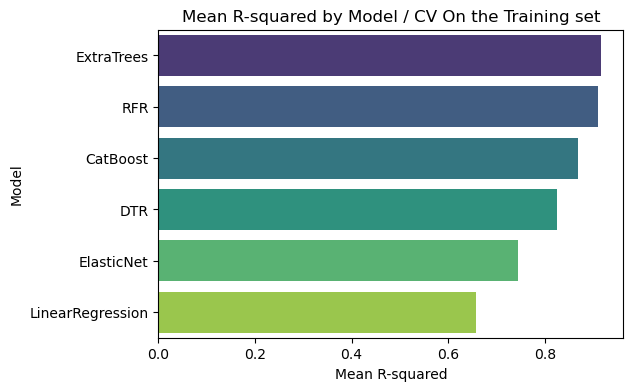

In [15]:
# Plotting "Mean R-squared" in bar chart: (Cross-validation On Training set)

CV_Result = CV_Result.sort_values(by="Mean R-squared", ascending=False)

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Mean R-squared", y="Model", data=CV_Result, palette="viridis")

# Add labels and title
plt.xlabel("Mean R-squared")
plt.ylabel("Model")
plt.title("Mean R-squared by Model / CV On the Training set")

### **Extra Trees**, **Random Forest** and **CatBoost** seem to be the best-performing models, with Extra Trees having a slightly higher average accuracy.

#### Let us plot the Learning Curves for the features to visualize the convergance of each feature

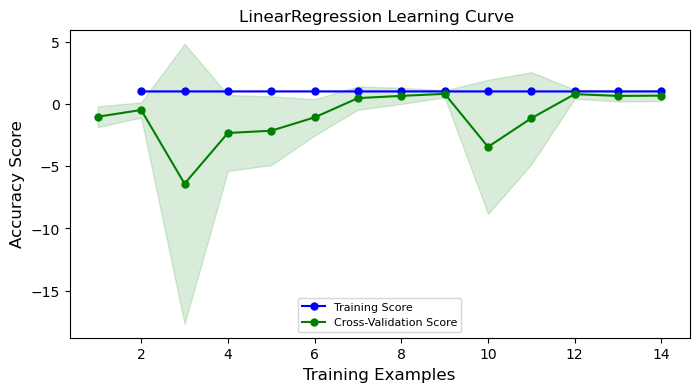

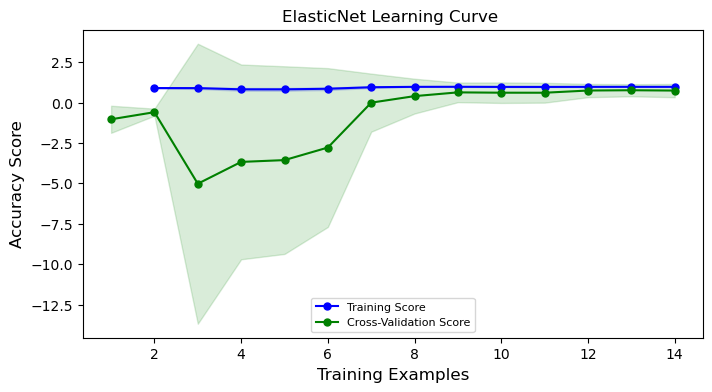

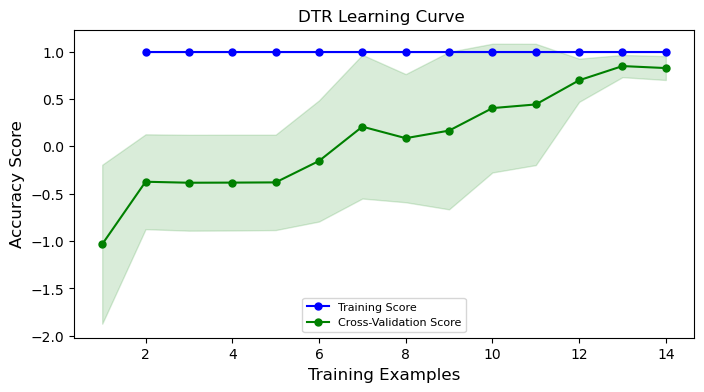

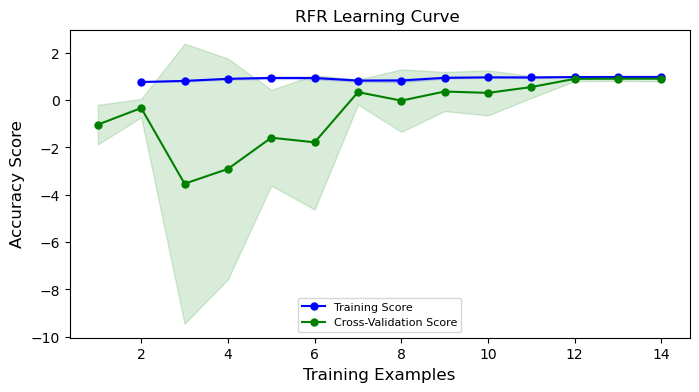

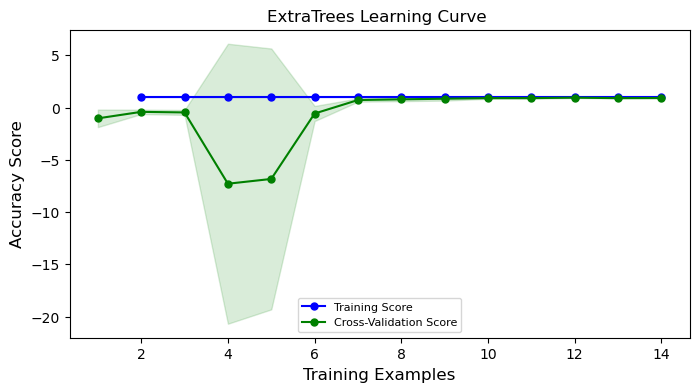

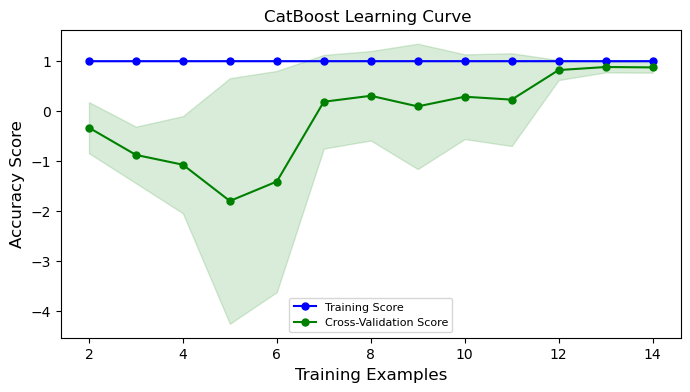

In [16]:

# Define the training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 20)

for model_name, model in models.items():
    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model, X=X_train_transformed, y=y_train,
        cv=5, train_sizes=train_sizes, n_jobs=-1)

    # Calculate training and test mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 4))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title(f'{model_name} Learning Curve ')
    plt.xlabel('Training Examples', fontsize=12)
    plt.ylabel('Accuracy Score', fontsize=12)

    plt.legend(loc='lower center', fontsize=8)


## c) Hyperparameter Tuning - GridSearchCV

In [17]:
# define the grid search function 
def grid_search_fit(model,params):   
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_mean_squared_error',n_jobs=-1, verbose=0)
    grid_search.fit(X_train_transformed,y_train)
    best_regressor = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred= best_regressor.predict(X_test_transformed)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    evaluation_metrics = {
        'best params':best_params,
        'model':re.sub(r'[^a-zA-Z]', '',str(model)), # save the model name as the string after removing the ()
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

    return evaluation_metrics

**Hyperparameter Search for Decision Tree Regressor:**

In [18]:
params= {
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 4, 8],  
    'min_samples_leaf': [1, 2, 4]}

DTR_metrics=grid_search_fit(DecisionTreeRegressor(),params)
DTR_metrics

{'best params': {'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 'model': 'DecisionTreeRegressor',
 'R2 Score': -0.7210618372874906,
 'MAE': 0.18866666666666676,
 'MSE': 0.1123922222222223,
 'RMSE': 0.335249492501066}

**Hyperparameter Search for Random Forest Regressor:**

In [19]:
params = {
            "n_estimators"      : [4, 5, 10, 20, 50, 200],
            "max_features"      : ["sqrt", "log2"],
            "min_samples_split" : [2, 4, 8],
            'max_depth': [10, 20, 30, 40, 50, None],
            "bootstrap": [True, False]}

RFR_metrics=grid_search_fit(RandomForestRegressor(),params)
RFR_metrics

{'best params': {'bootstrap': False,
  'max_depth': 20,
  'max_features': 'log2',
  'min_samples_split': 2,
  'n_estimators': 4},
 'model': 'RandomForestRegressor',
 'R2 Score': 0.8520955837314715,
 'MAE': 0.07749999999999994,
 'MSE': 0.009658749999999982,
 'RMSE': 0.09827893975822075}

**Hyperparameter Search for Extra Trees Regressor:**

In [20]:
params= {
            "n_estimators"      : [4, 5, 10, 20, 50, 200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2, 4, 8],
            'max_depth': [10, 20, 30, 40, 50, None],
            "bootstrap": [True, False]}


ETR_metrics=grid_search_fit(ExtraTreesRegressor(),params)
ETR_metrics

{'best params': {'bootstrap': False,
  'max_depth': 50,
  'max_features': 'log2',
  'min_samples_split': 4,
  'n_estimators': 20},
 'model': 'ExtraTreesRegressor',
 'R2 Score': 0.7337784949365016,
 'MAE': 0.11485000000000004,
 'MSE': 0.0173853291666667,
 'RMSE': 0.1318534382057089}

**Hyperparameter Search for Elastic Net Regression:**

In [21]:
params = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],  
    'max_iter': [1000, 2000, 5000]}
ENR_metrics=grid_search_fit(ElasticNet(),params)
ENR_metrics

{'best params': {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000},
 'model': 'ElasticNet',
 'R2 Score': 0.6810942837937576,
 'MAE': 0.12935818745243194,
 'MSE': 0.02082581889113246,
 'RMSE': 0.14431153415833559}

**Hyperparameter Search for CatBoost Regressor:**

In [22]:
params = {
    'iterations': [100, 200, 300],  # Number of iterations
    'learning_rate': [0.01, 0.1],  # Learning rate
    'depth': [4,6, 8, 10],  # Depth of the trees
    'l2_leaf_reg': [3, 5, 7],  # L2 regularization
}

CBR_metrics=grid_search_fit(CatBoostRegressor(),params)
CBR_metrics

0:	learn: 1.0108231	total: 939us	remaining: 281ms
1:	learn: 0.9738980	total: 2.1ms	remaining: 312ms
2:	learn: 0.9372703	total: 2.88ms	remaining: 285ms
3:	learn: 0.8906846	total: 3.38ms	remaining: 250ms
4:	learn: 0.8439368	total: 3.99ms	remaining: 235ms
5:	learn: 0.7990583	total: 4.6ms	remaining: 225ms
6:	learn: 0.7643453	total: 5.37ms	remaining: 225ms
7:	learn: 0.7353259	total: 5.88ms	remaining: 215ms
8:	learn: 0.6912379	total: 6.31ms	remaining: 204ms
9:	learn: 0.6567746	total: 7.13ms	remaining: 207ms
10:	learn: 0.6359032	total: 7.93ms	remaining: 208ms
11:	learn: 0.6042002	total: 8.52ms	remaining: 204ms
12:	learn: 0.5813530	total: 9.64ms	remaining: 213ms
13:	learn: 0.5499588	total: 10ms	remaining: 205ms
14:	learn: 0.5200549	total: 10.4ms	remaining: 197ms
15:	learn: 0.4999992	total: 11ms	remaining: 196ms
16:	learn: 0.4740938	total: 11.6ms	remaining: 194ms
17:	learn: 0.4552329	total: 12.4ms	remaining: 194ms
18:	learn: 0.4396101	total: 12.8ms	remaining: 189ms
19:	learn: 0.4174640	total: 1

192:	learn: 0.0026020	total: 179ms	remaining: 99.3ms
193:	learn: 0.0025370	total: 181ms	remaining: 98.8ms
194:	learn: 0.0024735	total: 183ms	remaining: 98.3ms
195:	learn: 0.0024117	total: 184ms	remaining: 97.6ms
196:	learn: 0.0023514	total: 185ms	remaining: 97ms
197:	learn: 0.0022926	total: 187ms	remaining: 96.3ms
198:	learn: 0.0022353	total: 188ms	remaining: 95.6ms
199:	learn: 0.0021794	total: 190ms	remaining: 94.9ms
200:	learn: 0.0021249	total: 191ms	remaining: 94.2ms
201:	learn: 0.0020718	total: 193ms	remaining: 93.6ms
202:	learn: 0.0020200	total: 194ms	remaining: 92.7ms
203:	learn: 0.0019695	total: 195ms	remaining: 91.8ms
204:	learn: 0.0019203	total: 196ms	remaining: 90.9ms
205:	learn: 0.0018723	total: 198ms	remaining: 90.2ms
206:	learn: 0.0018255	total: 199ms	remaining: 89.2ms
207:	learn: 0.0017798	total: 200ms	remaining: 88.4ms
208:	learn: 0.0017353	total: 201ms	remaining: 87.5ms
209:	learn: 0.0016920	total: 202ms	remaining: 86.6ms
210:	learn: 0.0016497	total: 203ms	remaining: 85

{'best params': {'depth': 8,
  'iterations': 300,
  'l2_leaf_reg': 3,
  'learning_rate': 0.1},
 'model': 'catboostcoreCatBoostRegressorobjectatxCADFD',
 'R2 Score': 0.6691563668803102,
 'MAE': 0.09502063617913352,
 'MSE': 0.021605412617248222,
 'RMSE': 0.14698779751138602}

**Hyperparameter Search for Linear Regressor:**

In [23]:
# Define the parameter grid for Linear Regressor
params = {
    'fit_intercept': [True, False] # Whether to calculate the intercept
}
LR_metrics=grid_search_fit(LinearRegression(),params)
LR_metrics

{'best params': {'fit_intercept': True},
 'model': 'LinearRegression',
 'R2 Score': 0.11745877636188118,
 'MAE': 0.20854234168186087,
 'MSE': 0.05763347206846372,
 'RMSE': 0.24006972334816343}

### Save the metrics for each model in a dataframe 

In [24]:
# Create DataFrames from the metric results which were saved as dictionaries
df1 = pd.DataFrame([DTR_metrics])
df2 = pd.DataFrame([RFR_metrics])
df3 = pd.DataFrame([LR_metrics])
df4 = pd.DataFrame([ENR_metrics])
df5 = pd.DataFrame([CBR_metrics])
df6 = pd.DataFrame([ETR_metrics])

# Concatenate DataFrames along the rows (axis=0)
combined_df = pd.concat([df1, df2, df3,df4,df5,df6], axis=0)

# Reset the index if needed
combined_df.reset_index(drop=True, inplace=True)


results=combined_df.sort_values(by="R2 Score",ascending=False)
final_metrics=results.drop('best params',axis=1)
final_metrics

model  R2 Score       MAE       MSE  \
1                        RandomForestRegressor  0.852096  0.077500  0.009659   
5                          ExtraTreesRegressor  0.733778  0.114850  0.017385   
3                                   ElasticNet  0.681094  0.129358  0.020826   
4  catboostcoreCatBoostRegressorobjectatxCADFD  0.669156  0.095021  0.021605   
2                             LinearRegression  0.117459  0.208542  0.057633   
0                        DecisionTreeRegressor -0.721062  0.188667  0.112392   

       RMSE  
1  0.098279  
5  0.131853  
3  0.144312  
4  0.146988  
2  0.240070  
0  0.335249

## Visualize the metrics for each model

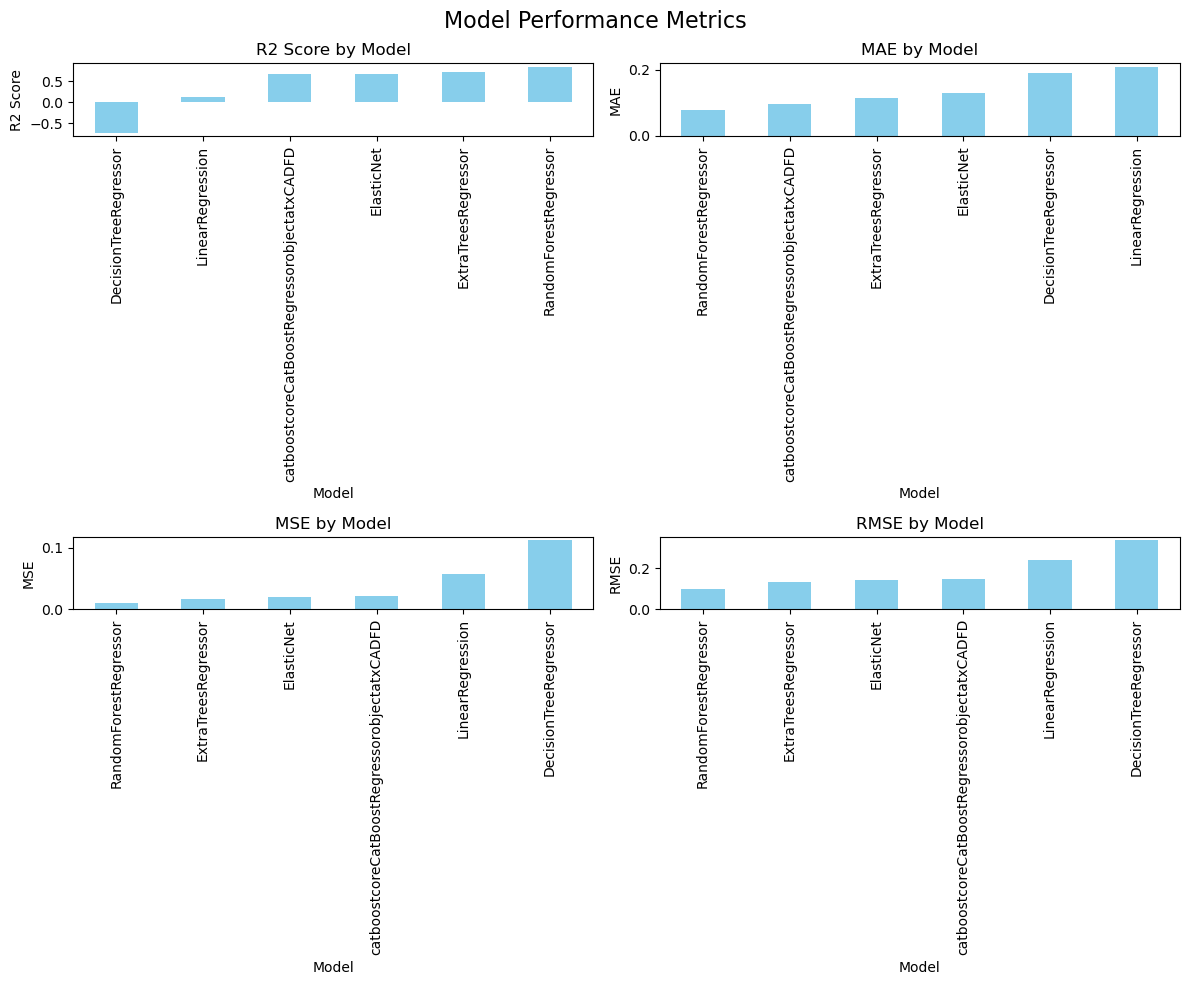

In [25]:
# Set the index to 'Model' column
final_metrics.set_index('model', inplace=True)

# Define a list of metrics to plot
metrics = ['R2 Score', 'MAE', 'MSE', 'RMSE']

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Performance Metrics', fontsize=16)

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Sort the DataFrame by the metric in ascending order
    sorted_df = final_metrics.sort_values(by=metric)
    sorted_df[metric].plot(kind='bar', ax=ax, color='skyblue')
    
    ax.set_title(f'{metric} by Model')
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    plt.tight_layout()




## From the above, it seems that the following models perform the best based on the combined metrics:
- ### Random Forest Regressor
- ### Catboost Regressor
- ### Elastic Net

#### We can comment out the other three models and proceed with the three models above for the next task.

# That is all Folks!!!

**Optimozd Random Forest Regressor**

In [26]:
# Define the best parameters obtained from grid search:

best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 'log2',
    'min_samples_split': 2,
    'n_estimators': 20}

In [27]:
# Initialize the Random Forest Regressor with the best parameters
best_rf_model = RandomForestRegressor(**best_params)

# Fit the model to your training data
best_rf_model.fit(X_train_transformed, y_train)  # Ensure you have this data available

RandomForestRegressor(max_features='log2', n_estimators=20)

In [28]:
import joblib
# Save the model to a .pkl file


joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [29]:
X_train.columns

Index(['Real_GDP_Ksh', 'Population_Growth', 'Female_Labor_Participation',
       'Male_Labor_Participation', 'Education_Expenditure_Ksh', 'Inflation',
       'Dollar_Rate', 'Labor_Total_Population_Ratio',
       'Urban_Population_Growth_Income_Per_Capita_Growth_Ratio'],
      dtype='object')

In [30]:
df.describe().T

count          mean  \
Real_GDP_Ksh                                         23.0  5.013512e+06   
Population_Growth                                    23.0  2.563478e+00   
Female_Labor_Participation                           23.0  4.576043e+01   
Male_Labor_Participation                             23.0  4.575261e+01   
Education_Expenditure_Ksh                            23.0  2.187303e+11   
Inflation                                            23.0  7.613043e+00   
Dollar_Rate                                          23.0  8.813952e+01   
Total_Unemployment                                   23.0  3.448261e+00   
Labor_Total_Population_Ratio                         23.0  9.226004e-01   
Urban_Population_Growth_Income_Per_Capita_Growt...   23.0  9.970084e-01   

                                                             std  \
Real_GDP_Ksh                                        3.346256e+06   
Population_Growth                                   4.305030e-01   
Female_Labor_Participation                          2.896549e+00   
Male_Labor_Participation                            1.759202e+00   
Education_Expenditure_Ksh                           1.432394e+11   
Inflation                                           3.251344e+00   
Dollar_Rate                                         1.411275e+01   
Total_Unemployment                                  9.915949e-01   
Labor_Total_Population_Ratio                        2.940971e-02   
Urban_Population_Growth_Income_Per_Capita_Growt...  4.954715e-02   

                                                             min  \
Real_GDP_Ksh                                        9.828550e+05   
Population_Growth                                   1.910000e+00   
Female_Labor_Participation                          4.154000e+01   
Male_Labor_Participation                            4.196000e+01   
Education_Expenditure_Ksh                           4.914291e+10   
Inflation                                           1.970000e+00   
Dollar_Rate                                         6.746677e+01   
Total_Unemployment                                  2.760000e+00   
Labor_Total_Population_Ratio                        8.846189e-01   
Urban_Population_Growth_Income_Per_Capita_Growt...  8.717933e-01   

                                                             25%  \
Real_GDP_Ksh                                        1.211127e+06   
Population_Growth                                   2.190000e+00   
Female_Labor_Participation                          4.336500e+01   
Male_Labor_Participation                            4.589000e+01   
Education_Expenditure_Ksh                           1.076227e+11   
Inflation                                           5.505000e+00   
Dollar_Rate                                         7.795137e+01   
Total_Unemployment                                  2.855000e+00   
Labor_Total_Population_Ratio                        9.005758e-01   
Urban_Population_Growth_Income_Per_Capita_Growt...  9.741587e-01   

                                                             50%  \
Real_GDP_Ksh                                        6.090206e+06   
Population_Growth                                   2.660000e+00   
Female_Labor_Participation                          4.577000e+01   
Male_Labor_Participation                            4.665000e+01   
Education_Expenditure_Ksh                           1.847061e+11   
Inflation                                           6.580000e+00   
Dollar_Rate                                         8.452290e+01   
Total_Unemployment                                  2.980000e+00   
Labor_Total_Population_Ratio                        9.202287e-01   
Urban_Population_Growth_Income_Per_Capita_Growt...  1.000919e+00   

                                                             75%           max  
Real_GDP_Ksh                                        7.739792e+06  9.851329e+06  
Population_Growth                                   2.970000e+00  3.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2000 to 2022
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Real_GDP_Ksh                                            23 non-null     int64  
 1   Population_Growth                                       23 non-null     float64
 2   Female_Labor_Participation                              23 non-null     float64
 3   Male_Labor_Participation                                23 non-null     float64
 4   Education_Expenditure_Ksh                               23 non-null     float64
 5   Inflation                                               23 non-null     float64
 6   Dollar_Rate                                             23 non-null     float64
 7   Total_Unemployment                                      23 non-null     float64
 8   Labor_Total_Population_Ratio              

In [32]:
X_train.shape

(18, 9)

In [33]:
X_train_transformed.shape

(18, 9)